In [1]:
# https://dbr.donga.com/article/view/1203/article_no/8181

### Data load

In [2]:
import pickle 
import numpy as np

In [3]:
with open('train_qa.txt', 'rb') as fp:
    train_data = pickle.load(fp)

In [4]:
with open('test_qa.txt', 'rb') as fp:
    test_data = pickle.load(fp)

In [5]:
test_data # list 형태로

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [6]:
train_data # list 형태로

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [7]:
# list 형태여서 len()
print(f'train_data: {len(train_data)}, test_data: {len(test_data)}')

train_data: 10000, test_data: 1000


In [8]:
train_data[0] # story1 -> (. : 구분자) story2 -> question -> answer

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [9]:
type(train_data[0])

tuple

In [10]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [11]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [12]:
train_data[0][2]

'no'

### vocabulary

In [13]:
vocab = set() # 중복 없이

In [14]:
all_data = train_data + test_data

In [15]:
for story, question, answer in all_data:
    # python set -> union -> collection set(중복 없이, 순서 없이) -> 합집합
    # 1, 2, 3, 4, 5
    # 2, 3, 5, 6, 8
    # 1, 2, 3, 4, 5, 6, 8 -> 이렇게 합집합으로 만들어주는 게 union임.
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question)) 

In [16]:
vocab.add('no')
vocab.add('yes')

In [17]:
vocab # 알파벳 순서대로 정렬. -> 37개

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [18]:
vocab_len = len(vocab) + 1 # pad_sequences -> 0을 사용하기 위해

In [19]:
max_story_len = max([len(data[0]) for data in all_data])

In [20]:
max_question_len = max([len(data[1]) for data in all_data])

In [21]:
# 최대 길이 -> pad_sequences를 위해서
print(f'max story length: {max_story_len}, max question length: {max_question_len}')

max story length: 156, max question length: 6


In [22]:
vocab_size = len(vocab) + 1

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [24]:
tokenizer = Tokenizer(filters = [])
tokenizer.fit_on_texts(vocab)

In [25]:
tokenizer.word_index # encoding

{'dropped': 1,
 'daniel': 2,
 'grabbed': 3,
 '.': 4,
 'is': 5,
 'there': 6,
 'garden': 7,
 'apple': 8,
 'bedroom': 9,
 'journeyed': 10,
 'no': 11,
 'the': 12,
 'in': 13,
 'took': 14,
 'moved': 15,
 'to': 16,
 'back': 17,
 'got': 18,
 'sandra': 19,
 'hallway': 20,
 'kitchen': 21,
 'mary': 22,
 'bathroom': 23,
 'put': 24,
 'picked': 25,
 'travelled': 26,
 '?': 27,
 'left': 28,
 'office': 29,
 'went': 30,
 'football': 31,
 'john': 32,
 'milk': 33,
 'down': 34,
 'up': 35,
 'yes': 36,
 'discarded': 37}

In [26]:
train_story_text = []
train_question_text = []
train_answers = []

for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [27]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [28]:
len(train_story_seq)

10000

In [29]:
len(train_story_text)

10000

In [30]:
train_story_seq

[[22, 15, 16, 12, 23, 4, 19, 10, 16, 12, 9, 4],
 [22,
  15,
  16,
  12,
  23,
  4,
  19,
  10,
  16,
  12,
  9,
  4,
  22,
  30,
  17,
  16,
  12,
  9,
  4,
  2,
  30,
  17,
  16,
  12,
  20,
  4],
 [22,
  15,
  16,
  12,
  23,
  4,
  19,
  10,
  16,
  12,
  9,
  4,
  22,
  30,
  17,
  16,
  12,
  9,
  4,
  2,
  30,
  17,
  16,
  12,
  20,
  4,
  19,
  30,
  16,
  12,
  21,
  4,
  2,
  30,
  17,
  16,
  12,
  23,
  4],
 [22,
  15,
  16,
  12,
  23,
  4,
  19,
  10,
  16,
  12,
  9,
  4,
  22,
  30,
  17,
  16,
  12,
  9,
  4,
  2,
  30,
  17,
  16,
  12,
  20,
  4,
  19,
  30,
  16,
  12,
  21,
  4,
  2,
  30,
  17,
  16,
  12,
  23,
  4,
  2,
  25,
  35,
  12,
  31,
  6,
  4,
  2,
  30,
  16,
  12,
  9,
  4],
 [22,
  15,
  16,
  12,
  23,
  4,
  19,
  10,
  16,
  12,
  9,
  4,
  22,
  30,
  17,
  16,
  12,
  9,
  4,
  2,
  30,
  17,
  16,
  12,
  20,
  4,
  19,
  30,
  16,
  12,
  21,
  4,
  2,
  30,
  17,
  16,
  12,
  23,
  4,
  2,
  25,
  35,
  12,
  31,
  6,
  4,
  2,
  30,
  16,


In [31]:
tokenizer.word_index # vocabulary index

{'dropped': 1,
 'daniel': 2,
 'grabbed': 3,
 '.': 4,
 'is': 5,
 'there': 6,
 'garden': 7,
 'apple': 8,
 'bedroom': 9,
 'journeyed': 10,
 'no': 11,
 'the': 12,
 'in': 13,
 'took': 14,
 'moved': 15,
 'to': 16,
 'back': 17,
 'got': 18,
 'sandra': 19,
 'hallway': 20,
 'kitchen': 21,
 'mary': 22,
 'bathroom': 23,
 'put': 24,
 'picked': 25,
 'travelled': 26,
 '?': 27,
 'left': 28,
 'office': 29,
 'went': 30,
 'football': 31,
 'john': 32,
 'milk': 33,
 'down': 34,
 'up': 35,
 'yes': 36,
 'discarded': 37}

In [32]:
# vector화 - 1행 n열짜리 위 아래로 길쭉한 벡터를 단어word별로 만듦.
'''
INPUT
data : Stories + Questions + Answers
word_index : Tokenizer -> dictionary (word_index)
max_story_len : the length of the longest story (pad_sequences)
mas_question_len : the length of the longest question (pad_sequences)
OUTPUT
Vector : Stories + Questions + Answers (padded sequences)
'''
def vectorize_stories(data, word_index = tokenizer.word_index, 
                      max_story_len = max_story_len, 
                      max_question_len = max_question_len):
    # STORIES
    X = []
    # QUESTIONS
    Xq = []
    # ANSWERS
    Y = []
    
    for story, question, answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in question]
        y = np.zeros(len(word_index) + 1) # ANSWER (Y / N) - 인덱스 값이 1부터 시작하니까.
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X, maxlen = max_story_len), pad_sequences(Xq, maxlen = max_question_len), np.array(Y)) # pad_sequences, TUPLE

In [33]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)

In [34]:
inputs_train

array([[ 0,  0,  0, ..., 12,  9,  4],
       [ 0,  0,  0, ..., 12, 20,  4],
       [ 0,  0,  0, ..., 12, 23,  4],
       ...,
       [ 0,  0,  0, ..., 12,  9,  4],
       [ 0,  0,  0, ..., 33,  6,  4],
       [ 0,  0,  0, ...,  8,  6,  4]])

In [35]:
questions_train

array([[ 5, 19, 13, 12, 20, 27],
       [ 5,  2, 13, 12, 23, 27],
       [ 5,  2, 13, 12, 29, 27],
       ...,
       [ 5, 19, 13, 12, 20, 27],
       [ 5, 22, 13, 12, 21, 27],
       [ 5, 22, 13, 12,  9, 27]])

In [36]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [37]:
print(f'inputs_train: {len(inputs_train)}, questions_train: {len(questions_train)}, answers_train: {len(answers_train)}')

inputs_train: 10000, questions_train: 10000, answers_train: 10000


In [38]:
inputs_test, questions_test, answers_test = vectorize_stories(test_data)

In [39]:
print(f'inputs_test: {len(inputs_test)}, questions_test: {len(questions_test)}, answers_test: {len(answers_test)}')

inputs_test: 1000, questions_test: 1000, answers_test: 1000


In [41]:
sum(answers_train) # no : 4988개, yes : 5012개

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0., 4988.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
       5012.,    0.])

In [42]:
sum(answers_test) # no : 503개, yes : 497개

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 497.,   0.])

### Create a Model

In [46]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout # Permute : 주어진 패턴에 따라서 입력 차수 변경
from tensorflow.keras.layers import add, dot, concatenate
from tensorflow.keras.layers import LSTM

In [47]:
input_sequence = Input((max_story_len,)) # tuple 형태로 저장
question = Input((max_question_len,))

#### Input Encoder m

In [48]:
# encoder - 소스 문장의 토큰들을 문장을 표현하는 벡터들의 집합으로 인코딩함.(수치화)
# 첫번째 embedding
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_size, output_dim = 64)) 
input_encoder_m.add(Dropout(0.3))

# Encoded -> (samples, story_maxlen, embedding_dim)

#### Input Encoder c

In [49]:
# 두번째 embedding -> question랑 차원이 같아야 함.
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_size, output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3))

# Output -> (samples, story_maxlen, question_maxlen)

#### Question Encoder

In [50]:
# question embedding
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_size, output_dim = 64, input_length = max_question_len))
question_encoder.add(Dropout(0.3))

# Output -> (samples, question_maxlen, embedding_dim)

In [51]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

#### pi = softmax()

In [52]:
# 행렬곱 -> tensor 3차원 이상이어서 axes
match = dot([input_encoded_m, question_encoded], axes = (2, 2)) 
match = Activation('softmax')(match)

In [125]:
match.shape

TensorShape([None, 156, 6])

#### Embedding C + pi

In [54]:
response = add([match, input_encoded_c]) # (samples, story_maxlen, question_maxlen)
response = Permute((2, 1))(response) # 정규화 (samples, question_maxlen, story_maxlen)
# question 데이터와 계산되어야 하니까. - 차원 변경

In [124]:
response.shape

TensorShape([None, 6, 156])

In [55]:
answer = concatenate([response, question_encoded]) # 축을 기준으로 연결.

In [56]:
answer # keras tensor 형태 -> 최종 모델에서 입력값으로 사용됨.

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [57]:
# make a model
answer = LSTM(32)(answer) # (samples, 32)

In [58]:
answer = Dropout(0.5)(answer)

In [59]:
answer = Dense(vocab_size)(answer) # (samples, vocab_size) # YES/NO
answer = Activation('softmax')(answer)

In [60]:
# 최종 모델
model = Model([input_sequence, question], answer) # 입력데이터, 최종 구성값
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])

In [61]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [63]:
r = model.fit([inputs_train, questions_train], answers_train, batch_size = 32,
              epochs = 150, validation_data = ([inputs_test, questions_test], answers_test))

Epoch 1/150
313/313 [==============================] - 7s 15ms/step - loss: 0.9235 - acc: 0.4966 - val_loss: 0.7022 - val_acc: 0.4970
Epoch 2/150
313/313 [==============================] - 4s 14ms/step - loss: 0.7059 - acc: 0.5011 - val_loss: 0.6933 - val_acc: 0.5030
Epoch 3/150
313/313 [==============================] - 4s 14ms/step - loss: 0.6961 - acc: 0.5026 - val_loss: 0.6983 - val_acc: 0.4970
Epoch 4/150
313/313 [==============================] - 4s 14ms/step - loss: 0.6955 - acc: 0.4928 - val_loss: 0.6932 - val_acc: 0.4980
Epoch 5/150
313/313 [==============================] - 4s 13ms/step - loss: 0.6953 - acc: 0.4964 - val_loss: 0.6934 - val_acc: 0.5030
Epoch 6/150
313/313 [==============================] - 4s 14ms/step - loss: 0.6941 - acc: 0.5090 - val_loss: 0.6931 - val_acc: 0.5030
Epoch 7/150
313/313 [==============================] - 4s 14ms/step - loss: 0.6950 - acc: 0.4950 - val_loss: 0.6944 - val_acc: 0.4970
Epoch 8/150
313/313 [==============================] - 4s 13ms

Epoch 62/150
313/313 [==============================] - 5s 17ms/step - loss: 0.3381 - acc: 0.8542 - val_loss: 0.4049 - val_acc: 0.8160
Epoch 63/150
313/313 [==============================] - 5s 17ms/step - loss: 0.3363 - acc: 0.8548 - val_loss: 0.4187 - val_acc: 0.8060
Epoch 64/150
313/313 [==============================] - 5s 17ms/step - loss: 0.3318 - acc: 0.8533 - val_loss: 0.4174 - val_acc: 0.8110
Epoch 65/150
313/313 [==============================] - 5s 17ms/step - loss: 0.3243 - acc: 0.8567 - val_loss: 0.3960 - val_acc: 0.8200
Epoch 66/150
313/313 [==============================] - 5s 17ms/step - loss: 0.3264 - acc: 0.8551 - val_loss: 0.4092 - val_acc: 0.8140
Epoch 67/150
313/313 [==============================] - 5s 17ms/step - loss: 0.3249 - acc: 0.8553 - val_loss: 0.4283 - val_acc: 0.8170
Epoch 68/150
313/313 [==============================] - 5s 17ms/step - loss: 0.3246 - acc: 0.8563 - val_loss: 0.4053 - val_acc: 0.8170
Epoch 69/150
313/313 [==============================] -

In [64]:
num = np.array(
      [
          [
              [1, 2, 3],
              [4, 5, 6]
          ],
          [
              [6, 7, 8], 
              [9, 10, 11]
          ]
      ]
)

In [65]:
num # 3차원 배열

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [69]:
num.shape

(2, 2, 3)

In [70]:
num[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [66]:
np.sum(num, axis = 0) # 행끼리 더함.

array([[ 7,  9, 11],
       [13, 15, 17]])

In [67]:
np.sum(num, axis = 1) # 열끼리 더함.

array([[ 5,  7,  9],
       [15, 17, 19]])

In [68]:
np.sum(num, axis = 2)

array([[ 6, 15],
       [21, 30]])

In [71]:
# axes = (2, 2)
a = Input(batch_shape = (None, 255, 64))
b = Input(batch_shape = (None, 5, 64))
print(f'a.shape: {a.shape}')
print(f'b.shape: {b.shape}')

a.shape: (None, 255, 64)
b.shape: (None, 5, 64)


In [72]:
result = dot([a, b], axes = (2, 2))

In [73]:
result.shape

TensorShape([None, 255, 5])

In [74]:
filename = 'chatbot_150_epochs_0329.h5'
model.save(filename)

### Evaluate the Model

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
print(r.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


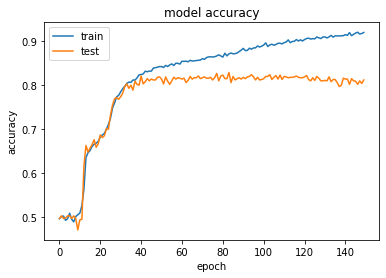

In [77]:
plt.plot(r.history['acc'])
plt.plot(r.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [79]:
model.load_weights(filename)
pred_result = model.predict(([inputs_test, questions_test]))

In [80]:
inputs_test

array([[ 0,  0,  0, ..., 12,  9,  4],
       [ 0,  0,  0, ..., 12,  7,  4],
       [ 0,  0,  0, ..., 12,  7,  4],
       ...,
       [ 0,  0,  0, ..., 12,  8,  4],
       [ 0,  0,  0, ..., 12,  7,  4],
       [ 0,  0,  0, ...,  8,  6,  4]])

In [81]:
questions_test

array([[ 5, 32, 13, 12, 21, 27],
       [ 5, 32, 13, 12, 21, 27],
       [ 5, 32, 13, 12,  7, 27],
       ...,
       [ 5, 22, 13, 12,  9, 27],
       [ 5, 19, 13, 12,  7, 27],
       [ 5, 22, 13, 12,  7, 27]])

In [83]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [84]:
story = ' '.join(word for word in test_data[0][0]) # 원래 모양대로
print(story)

Mary got the milk there . John moved to the bedroom .


In [85]:
question = ' '.join(word for word in test_data[0][1])
print(question)

Is John in the kitchen ?


In [87]:
print('Test Answer:', test_data[0][2])

Test Answer: no


In [89]:
pred_result[0]

array([5.2608629e-10, 5.4850591e-10, 4.9528526e-10, 5.1262983e-10,
       5.7113425e-10, 5.5528282e-10, 5.9619870e-10, 5.1154758e-10,
       4.8172272e-10, 5.3119131e-10, 4.9484339e-10, 9.9808770e-01,
       5.1548599e-10, 5.1672927e-10, 5.0362353e-10, 5.0066024e-10,
       4.9567467e-10, 4.4931392e-10, 5.1747095e-10, 5.1040050e-10,
       5.4249111e-10, 5.3811339e-10, 5.3301202e-10, 4.9640603e-10,
       4.7399207e-10, 5.3617399e-10, 5.6161620e-10, 5.0177107e-10,
       5.7648503e-10, 5.3976218e-10, 4.9472448e-10, 4.9031773e-10,
       5.3386262e-10, 5.1262883e-10, 5.0528515e-10, 5.4349986e-10,
       1.9122087e-03, 4.7418736e-10], dtype=float32)

In [90]:
val_max = np.argmax(pred_result[0])

In [95]:
for key, value in tokenizer.word_index.items():
    if value == val_max:
        k = key

In [96]:
print('Predicted answer:', k)

Predicted answer: no


In [97]:
print(pred_result[0][val_max])

0.9980877


In [102]:
test_data[7][0]

['Daniel',
 'went',
 'back',
 'to',
 'the',
 'kitchen',
 '.',
 'Mary',
 'grabbed',
 'the',
 'apple',
 'there',
 '.',
 'Daniel',
 'journeyed',
 'to',
 'the',
 'office',
 '.',
 'John',
 'went',
 'back',
 'to',
 'the',
 'office',
 '.',
 'Mary',
 'left',
 'the',
 'apple',
 '.',
 'Daniel',
 'went',
 'to',
 'the',
 'hallway',
 '.']

In [103]:
story = ' '.join(word for word in test_data[7][0])
print(story)

Daniel went back to the kitchen . Mary grabbed the apple there . Daniel journeyed to the office . John went back to the office . Mary left the apple . Daniel went to the hallway .


In [105]:
question = ' '.join(word for word in test_data[7][1])
print(question)

Is Daniel in the hallway ?


In [106]:
print('Test answer:', test_data[7][2])

Test answer: yes


In [107]:
pred_result[7]

array([3.2462134e-11, 2.9977128e-11, 2.8213164e-11, 3.1116276e-11,
       3.0872360e-11, 3.1718496e-11, 3.3442544e-11, 2.9023700e-11,
       3.0918088e-11, 2.9921836e-11, 2.9980220e-11, 4.6844088e-02,
       2.8528204e-11, 3.1262978e-11, 2.9474798e-11, 2.9673469e-11,
       3.3628683e-11, 2.7472278e-11, 2.9734545e-11, 2.9199164e-11,
       3.2978117e-11, 2.8144155e-11, 3.0499072e-11, 3.1718978e-11,
       3.2363466e-11, 2.9459737e-11, 3.0432826e-11, 2.9828157e-11,
       3.0184251e-11, 3.0339630e-11, 3.0024969e-11, 2.9573347e-11,
       2.9786767e-11, 2.9200833e-11, 2.8968949e-11, 3.4727155e-11,
       9.5315593e-01, 2.9133630e-11], dtype=float32)

In [108]:
val_max = np.argmax(pred_result[7])

In [109]:
for key, value in tokenizer.word_index.items():
    if value == val_max:
        k = key

In [110]:
print('Predicted answer:', k)

Predicted answer: yes


In [111]:
print(pred_result[7][val_max])

0.95315593


In [112]:
my_story = 'John left the kitchen . Sandra dropped the football in the garden .'
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [113]:
my_question = 'Is the football in the garden ?'
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [114]:
my_data = [(my_story.split(), my_question.split(), 'yes')]

In [116]:
# 벡터화
my_story, my_question, my_answer = vectorize_stories(my_data)

In [117]:
pred_result = model.predict(([my_story, my_question]))

In [118]:
pred_result

array([[1.1273085e-09, 1.2007806e-09, 1.1568980e-09, 1.1974162e-09,
        1.2381982e-09, 1.2369542e-09, 1.2223591e-09, 1.1114093e-09,
        1.0871182e-09, 1.1885920e-09, 1.2008883e-09, 9.9665689e-01,
        1.1616076e-09, 1.1184161e-09, 1.0804557e-09, 1.1103987e-09,
        1.1100662e-09, 1.1195239e-09, 1.1867096e-09, 1.2148283e-09,
        1.2133070e-09, 1.2980043e-09, 1.2171408e-09, 1.1117930e-09,
        1.1288704e-09, 1.1183394e-09, 1.1632484e-09, 1.2258214e-09,
        1.2116027e-09, 1.2049148e-09, 1.1712386e-09, 1.1148552e-09,
        1.2306450e-09, 1.2013877e-09, 1.0961170e-09, 1.1463458e-09,
        3.3430369e-03, 1.0665917e-09]], dtype=float32)

In [119]:
val_max = np.argmax(pred_result[0])
val_max

11

In [121]:
for key, value in tokenizer.word_index.items():
    print(key, ':', value)

dropped : 1
daniel : 2
grabbed : 3
. : 4
is : 5
there : 6
garden : 7
apple : 8
bedroom : 9
journeyed : 10
no : 11
the : 12
in : 13
took : 14
moved : 15
to : 16
back : 17
got : 18
sandra : 19
hallway : 20
kitchen : 21
mary : 22
bathroom : 23
put : 24
picked : 25
travelled : 26
? : 27
left : 28
office : 29
went : 30
football : 31
john : 32
milk : 33
down : 34
up : 35
yes : 36
discarded : 37


In [122]:
for key, value in tokenizer.word_index.items():
    if value == val_max:
        k = key

In [123]:
print('Predicted answer:', k)
print(pred_result[0][val_max])

Predicted answer: no
0.9966569


In [ ]:
# 답 틀림,, # embedding 3번 -> LSTM

# tokenizer -> sequences -> embedding -> (padding) -> vectorizer(이게 필요함.)
# 한국어 : 어간 추출(stem) -> 표제어 추출(lemma) -> 불용어 제거(stop words)